In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Crop Production data.csv')

In [3]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
df.shape

(246091, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,246091.0,2005.643018,4.952164e+00,1997.00,2002.0,2006.0,2010.0,2.015000e+03
Area,246091.0,12002.820864,5.052340e+04,0.04,80.0,582.0,4392.0,8.580100e+06
Production,242361.0,582503.442251,1.706581e+07,0.00,88.0,729.0,7023.0,1.250800e+09


In [7]:
state_abbreviations = {
    'Andaman and Nicobar Islands': 'ANI',
    'Andhra Pradesh': 'AP',
    'Arunachal Pradesh': 'ARP',
    'Assam': 'ASM',
    'Bihar': 'BHR',
    'Chandigarh': 'CHD',
    'Chhattisgarh': 'CHG',
    'Dadra and Nagar Haveli': 'DNH',
    'Goa': 'GOA',
    'Gujarat': 'GUJ',
    'Haryana': 'HAR',
    'Himachal Pradesh': 'HP',
    'Jammu and Kashmir ': 'J&K',
    'Jharkhand': 'JHK',
    'Karnataka': 'KAR',
    'Kerala': 'KER',
    'Madhya Pradesh': 'MP',
    'Maharashtra': 'MAH',
    'Manipur': 'MAN',
    'Meghalaya': 'MEG',
    'Mizoram': 'MIZ',
    'Nagaland': 'NAG',
    'Odisha': 'ODI',
    'Puducherry': 'PUD',
    'Punjab': 'PUN',
    'Rajasthan': 'RAJ',
    'Sikkim': 'SIK',
    'Tamil Nadu': 'TN',
    'Telangana ': 'TEL',
    'Tripura': 'TRI',
    'Uttar Pradesh': 'UP',
    'Uttarakhand': 'UK',
    'West Bengal': 'WB'
}

df['State_Name'] = df['State_Name'].replace(state_abbreviations)

In [8]:
df['Crop'].value_counts()

Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
                     ...  
Litchi                   6
Coffee                   6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: Crop, Length: 124, dtype: int64

In [9]:
# Step 1: Group by 'Crop' and count occurrences
crop_count = df.groupby('Crop').size().reset_index(name='Count')

# Step 2: Sort the crops by count in descending order and select the top 10
top_10_crops = crop_count.sort_values(by='Count', ascending=False).head(10)['Crop']

# Step 3: Filter the original DataFrame for only the top 10 crops
subset_df = df[df['Crop'].isin(top_10_crops)]

subset_df = df[df['Crop_Year'] != 2015]

subset_df = subset_df.sort_values(by=['Crop_Year', 'Crop'])

# Step 4: Display the resulting DataFrame with all respective columns
subset_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
12743,ASM,BARPETA,1997,Whole Year,Arecanut,7160.0,5360.0
13334,ASM,BONGAIGAON,1997,Whole Year,Arecanut,2950.0,3521.0
13920,ASM,CACHAR,1997,Whole Year,Arecanut,4505.0,1058.0
14844,ASM,DARRANG,1997,Whole Year,Arecanut,4325.0,1710.0
15423,ASM,DHEMAJI,1997,Whole Year,Arecanut,835.0,756.0
...,...,...,...,...,...,...,...
233831,UK,HARIDWAR,2014,Rabi,other oilseeds,18.0,9.0
235016,UK,PITHORAGARH,2014,Kharif,other oilseeds,103.0,69.0
235697,UK,TEHRI GARHWAL,2014,Kharif,other oilseeds,3.0,2.0
236103,UK,UDAM SINGH NAGAR,2014,Rabi,other oilseeds,3.0,2.0


In [10]:
subset_df = subset_df.drop(columns=['District_Name'])
subset_df

,State_Name,Crop_Year,Season,Crop,Area,Production
12743,ASM,1997,Whole Year,Arecanut,7160.0,5360.0
13334,ASM,1997,Whole Year,Arecanut,2950.0,3521.0
13920,ASM,1997,Whole Year,Arecanut,4505.0,1058.0
14844,ASM,1997,Whole Year,Arecanut,4325.0,1710.0
15423,ASM,1997,Whole Year,Arecanut,835.0,756.0
...,...,...,...,...,...,...
233831,UK,2014,Rabi,other oilseeds,18.0,9.0
235016,UK,2014,Kharif,other oilseeds,103.0,69.0
235697,UK,2014,Kharif,other oilseeds,3.0,2.0
236103,UK,2014,Rabi,other oilseeds,3.0,2.0


In [11]:
# Group by 'State_Name', 'Crop_Year', and 'Crop', then calculate the sum of 'Area' and 'Production'
subset_df = subset_df.groupby(['State_Name', 'Crop_Year', 'Crop']).agg({'Area': 'sum', 'Production': 'sum'}).reset_index()

# Display the result
subset_df

,State_Name,Crop_Year,Crop,Area,Production
0,ANI,2000,Arecanut,4354.0,7200.0
1,ANI,2000,Banana,1707.0,12714.0
2,ANI,2000,Cashewnut,800.0,219.0
3,ANI,2000,Coconut,25160.0,89000000.0
4,ANI,2000,Dry ginger,388.0,1220.0
...,...,...,...,...,...
12959,WB,2014,Sugarcane,17728.0,2105506.0
12960,WB,2014,Sunflower,6899.0,9002.0
12961,WB,2014,Tobacco,14230.0,23828.0
12962,WB,2014,Urad,71707.0,51765.0


Make line charts of increse in production/ cropwise in states yearly.

In [12]:
state_crp_cum_df = df.groupby(['Crop_Year', 'Crop', 'State_Name'])[['Area', 'Production']].sum().reset_index()

state_crp_cum_df['Productivity'] = state_crp_cum_df['Production'] / state_crp_cum_df['Area']

state_crp_cum_df

,Crop_Year,Crop,State_Name,Area,Production,Productivity
0,1997,Arecanut,ASM,73814.0,56708.0,0.768255
1,1997,Arecanut,KAR,93100.0,133342.0,1.432245
2,1997,Arecanut,KER,76145.0,93995.0,1.234421
3,1997,Arecanut,MEG,9569.0,12116.0,1.266172
4,1997,Arecanut,WB,8058.0,12423.0,1.541698
...,...,...,...,...,...,...
12981,2015,Sugarcane,ODI,8962.0,577157.2,64.400491
12982,2015,Urad,ODI,74318.0,24381.1,0.328065
12983,2015,Urad,SIK,2904.0,2682.0,0.923554
12984,2015,Wheat,ODI,367.0,494.4,1.347139


In [13]:
subset_df.value_counts('Crop')

Crop
Rice                   511
Sugarcane              456
Maize                  456
Wheat                  428
Sesamum                399
                      ... 
Atcanut (Raw)            1
Perilla                  1
Rajmash Kholar           1
Cashewnut Processed      1
Jobster                  1
Length: 124, dtype: int64

In [14]:
crp_cum_df = subset_df.groupby(['Crop_Year', 'Crop'])[['Area', 'Production']].sum().reset_index()

crp_cum_df['Productivity'] = (crp_cum_df['Production'] / crp_cum_df['Area']).round(4)


crp_cum_df

,Crop_Year,Crop,Area,Production,Productivity
0,1997,Arecanut,260686.0,308584.0,1.1837
1,1997,Arhar/Tur,3325278.0,1693632.0,0.5093
2,1997,Bajra,9527424.0,7622765.0,0.8001
3,1997,Banana,216302.0,8577683.0,39.6561
4,1997,Barley,772715.0,1586845.0,2.0536
...,...,...,...,...,...
1165,2014,Total foodgrain,1750762.0,3225930.0,1.8426
1166,2014,Turmeric,99138.0,485938.4,4.9016
1167,2014,Urad,1348203.0,825895.8,0.6126
1168,2014,Wheat,17590692.0,42048966.1,2.3904


Make Plots of Area v/s Production v/s Productivity at crop level
Make inferences.

# EDA and Forecasting


Explanation Markdown

## I. Rice

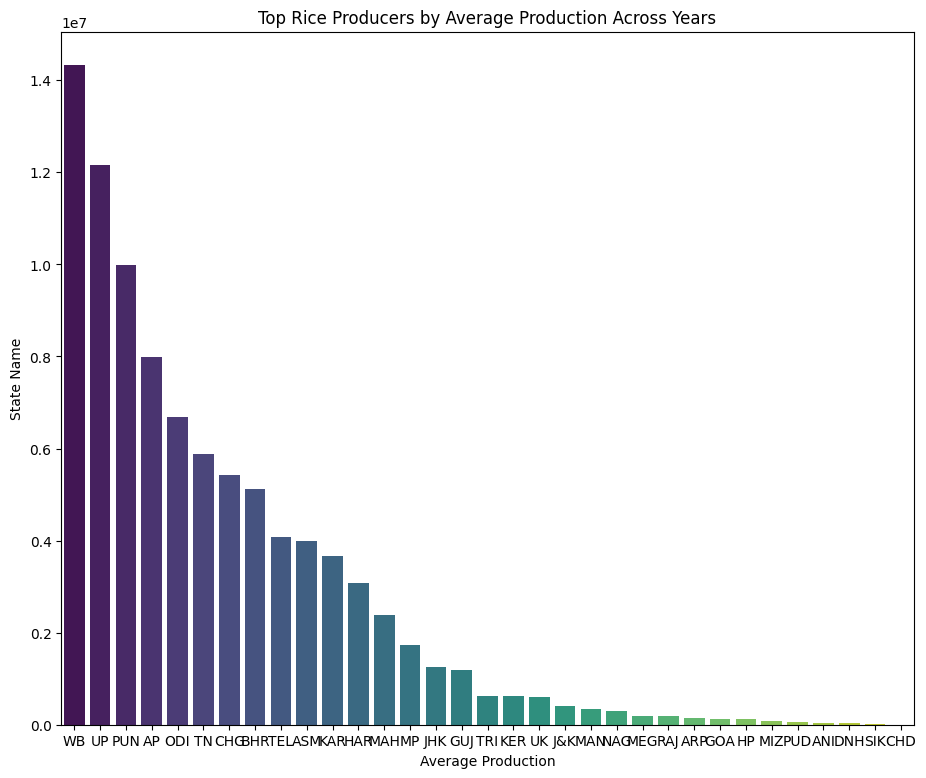

In [15]:
# Highest Production as per states.

rice_df = subset_df[subset_df['Crop'] == 'Rice']

avg_production = rice_df.groupby('State_Name')['Production'].mean().reset_index()

avg_production_sorted = avg_production.sort_values(by='Production', ascending=False)

# Step 4: Plot the bar chart
plt.figure(figsize=(11, 9))
sns.barplot(x='State_Name', y='Production', data=avg_production_sorted, palette='viridis')
plt.title('Top Rice Producers by Average Production Across Years')
plt.xlabel('Average Production')
plt.ylabel('State Name')
plt.show()

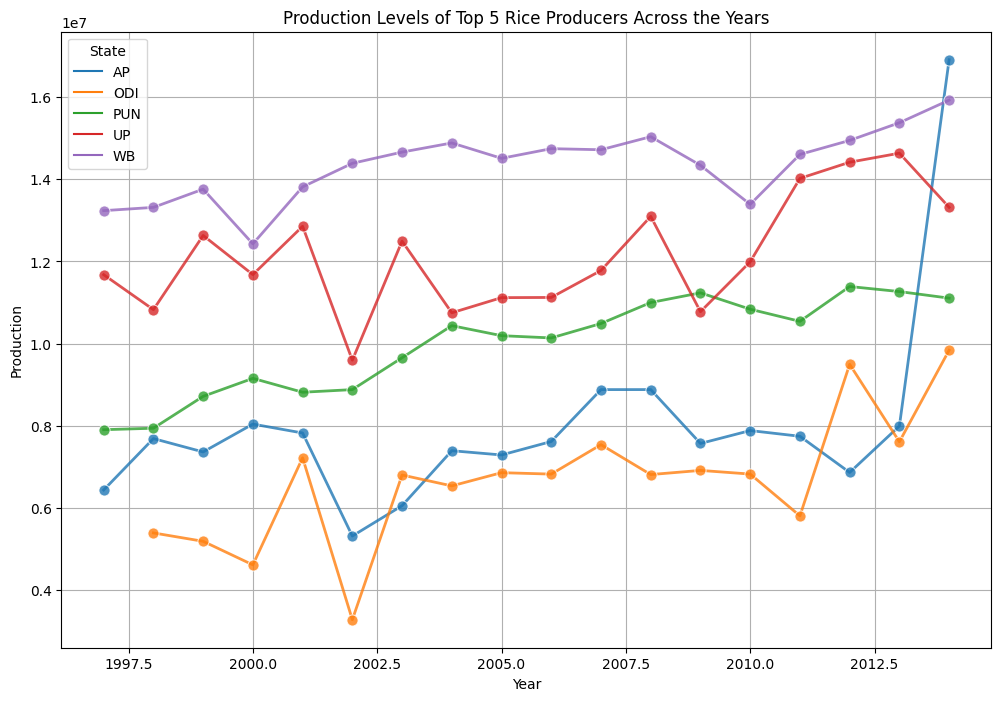

In [16]:
top_5_states = avg_production.sort_values(by='Production', ascending=False).head(5)['State_Name']

top_5_rice_df = rice_df[rice_df['State_Name'].isin(top_5_states)]

plt.figure(figsize=(12, 8))
sns.lineplot(x='Crop_Year', y='Production', hue='State_Name', data=top_5_rice_df, 
             palette='tab10', marker='o', markersize=8, linewidth=2, errorbar=None, alpha=0.8)

# Adding chart details
plt.title('Production Levels of Top 5 Rice Producers Across the Years')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend(title='State')
plt.grid(True)

# Display the plot
plt.show()

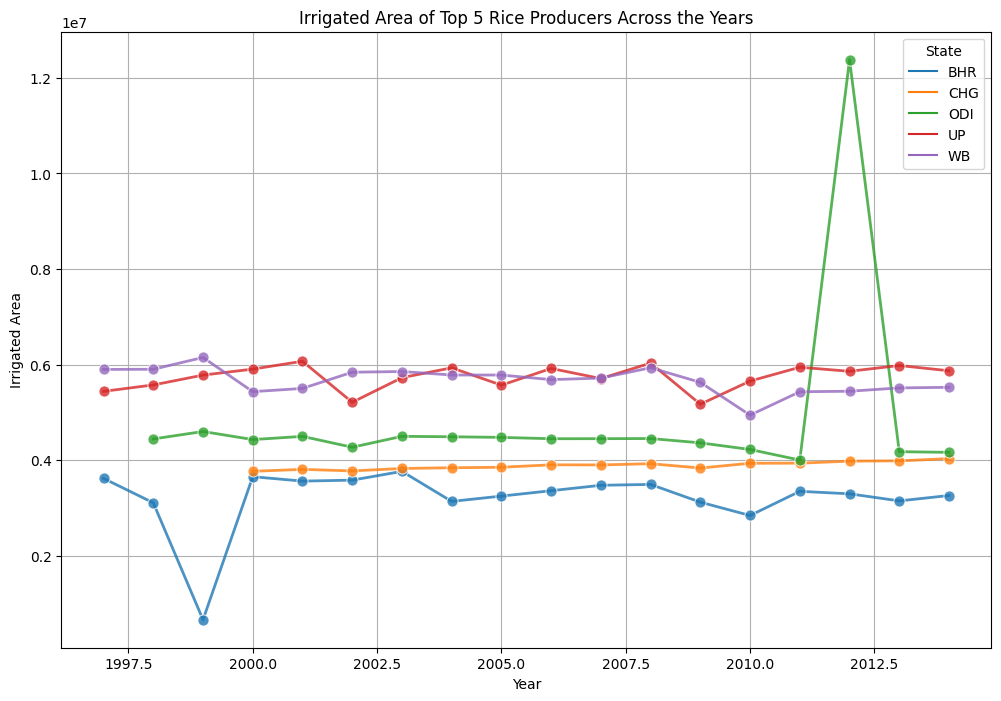

In [17]:
total_area = rice_df.groupby(['State_Name', 'Crop_Year'])['Area'].sum().reset_index()

area_5_states = total_area.sort_values(by='Area', ascending=False).head(5)['State_Name']

top_5_states = total_area.groupby('State_Name')['Area'].sum().sort_values(ascending=False).head(5).index

top_5_rice_df = rice_df[rice_df['State_Name'].isin(top_5_states)]

plt.figure(figsize=(12, 8))

sns.lineplot(x='Crop_Year', y='Area', hue='State_Name', data=top_5_rice_df, 
             palette='tab10', marker='o', markersize=8, linewidth=2, errorbar=None, alpha=0.8)

plt.title('Irrigated Area of Top 5 Rice Producers Across the Years')
plt.xlabel('Year')
plt.ylabel('Irrigated Area')
plt.legend(title='State')
plt.grid(True)

plt.show()

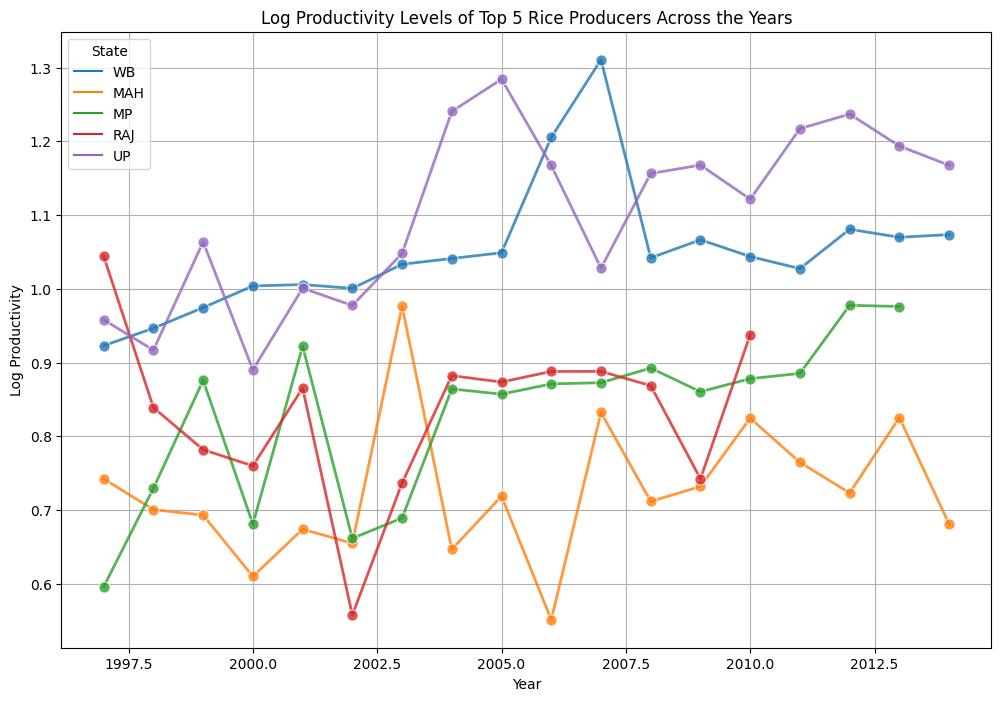

In [18]:
state_crp_cum_df = subset_df.groupby(['Crop_Year', 'Crop', 'State_Name'])[['Area', 'Production']].sum().reset_index()

state_crp_cum_df['Productivity'] = state_crp_cum_df['Production'] / state_crp_cum_df['Area']

state_crp_cum_df['Log_Productivity'] = np.log(state_crp_cum_df['Productivity'] + 1)

# Step 3: Identify the top 5 states by total area
top_5_states = state_crp_cum_df.groupby('State_Name')['Area'].sum().sort_values(ascending=False).head(5).index

# Step 4: Filter the dataset for these top 5 states
top_5_productivity_df = state_crp_cum_df[state_crp_cum_df['State_Name'].isin(top_5_states)]

# Step 5: Plot the line chart for productivity levels
plt.figure(figsize=(12, 8))

# Using seaborn's lineplot
sns.lineplot(x='Crop_Year', y='Log_Productivity', hue='State_Name', data=top_5_productivity_df, 
             palette='tab10', marker='o', markersize=8, linewidth=2, errorbar=None, alpha=0.8)

# Adding chart details
plt.title('Log Productivity Levels of Top 5 Rice Producers Across the Years')
plt.xlabel('Year')
plt.ylabel('Log Productivity')
plt.legend(title='State')
plt.grid(True)

# Display the plot
plt.show()

In [19]:
ind_rice = rice_df.groupby('Crop_Year')['Production'].sum().reset_index()

# Set 'Crop_Year' as the index
ind_rice.set_index('Crop_Year', inplace=True)

ind_rice.rename(columns={'Production': 'Rice_Production'}, inplace=True)

# Convert 'Rice_Production' to integers
ind_rice['Rice_Production'] = ind_rice['Rice_Production'].astype(int)

# Display the updated DataFrame
ind_rice.T


Crop_Year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Rice_Production,65848504,78761219,77917065,83092698,90057868,71453399,87835972,84172521,89587185,91676287,92064810,95261272,87356341,95176207,102093897,100330481,102872769,104018196


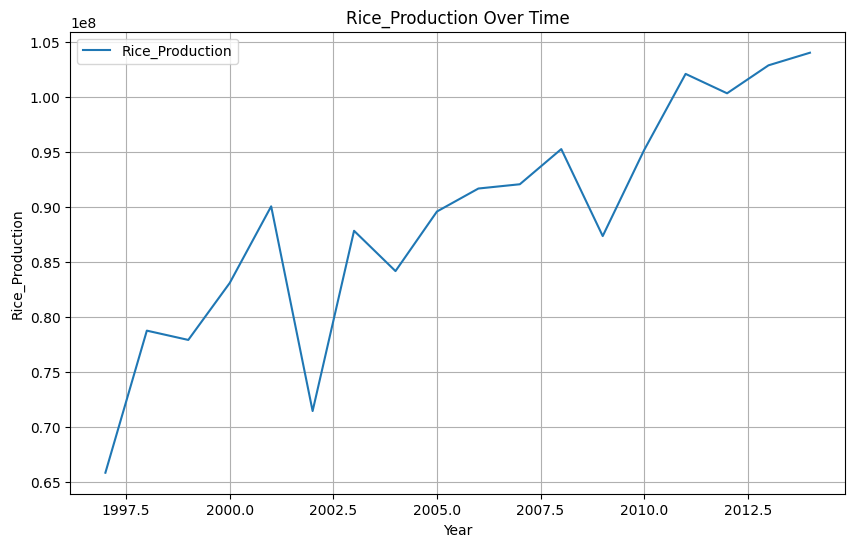

ADF Statistic: 0.9047023708068941
p-value: 0.9931513877051307


In [20]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(ind_rice, label='Rice_Production')
plt.title('Rice_Production Over Time')
plt.xlabel('Year')
plt.ylabel('Rice_Production')
plt.legend()
plt.grid(True)
plt.show()

# Perform Augmented Dickey-Fuller test
result = adfuller(ind_rice['Rice_Production'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


Shape of X: (15, 3, 1)
Shape of y: (15, 1)
Reshaped X shape: (15, 3, 1)
Epoch 1/100
15/15 [==============================] - 4s 7ms/step - loss: 0.2806
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0218
Epoch 3/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0316
Epoch 4/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0269
Epoch 5/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0257
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0254
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0286
Epoch 8/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0394
Epoch 9/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0226
Epoch 10/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0247
Epoch 11/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0260
Epoch 12/100
15/15 [==========================

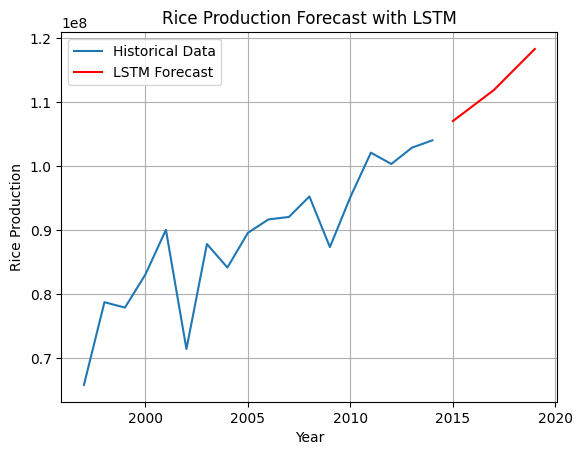

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data for LSTM - only use 'Rice_Production' (univariate series)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ind_rice[['Rice_Production']])  # Ensure we only scale the rice production column

# Function to create sequences of data for LSTM
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Parameters
sequence_length = 3  # Choose how many time steps to look back

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Debugging: Print the shape of X and y to ensure correctness
print(f"Shape of X: {X.shape}")  # Should be (samples, time steps, 1 feature)
print(f"Shape of y: {y.shape}")  # Should be (samples, )

# Ensure X has the correct shape for LSTM input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Adding the feature dimension

# Debugging: After reshaping, let's check the shape again
print(f"Reshaped X shape: {X.shape}")  # Should be (samples, time steps, 1 feature)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, batch_size=1, epochs=100)

# Forecast next 5 years
last_sequence = scaled_data[-sequence_length:].reshape(1, sequence_length, 1)  # Use last available sequence
predictions = []
for i in range(5):
    pred = model.predict(last_sequence)
    predictions.append(pred[0, 0])
    
    # Reshape the prediction to match the shape of last_sequence
    pred_reshaped = np.array([[[pred[0, 0]]]])  # Reshape pred into (1, 1, 1) so it can be concatenated

    # Update the sequence with the predicted value
    last_sequence = np.append(last_sequence[:, 1:, :], pred_reshaped, axis=1)

# Inverse scale the predictions to get back to the original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Plot the results
plt.plot(ind_rice.index, ind_rice['Rice_Production'], label='Historical Data')
future_years = np.arange(2015, 2020)
plt.plot(future_years, predictions, label='LSTM Forecast', color='red')
plt.title('Rice Production Forecast with LSTM')
plt.xlabel('Year')
plt.ylabel('Rice Production')
plt.legend()
plt.grid(True)
plt.show()

# II. Maize

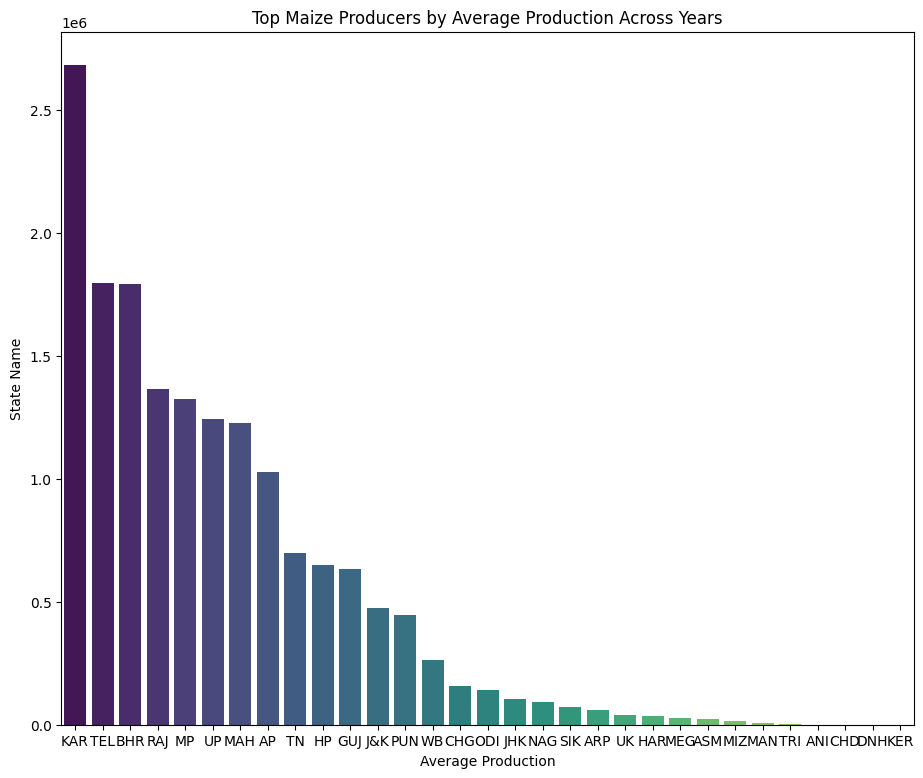

In [22]:
# Highest Maize Production as per states.

maize_df = subset_df[subset_df['Crop'] == 'Maize']

avg_production_maize = maize_df.groupby('State_Name')['Production'].mean().reset_index()

avg_production_maize_sorted = avg_production_maize.sort_values(by='Production', ascending=False)

# Step 4: Plot the bar chart
plt.figure(figsize=(11, 9))
sns.barplot(x='State_Name', y='Production', data=avg_production_maize_sorted, palette='viridis')
plt.title('Top Maize Producers by Average Production Across Years')
plt.xlabel('Average Production')
plt.ylabel('State Name')
plt.show()

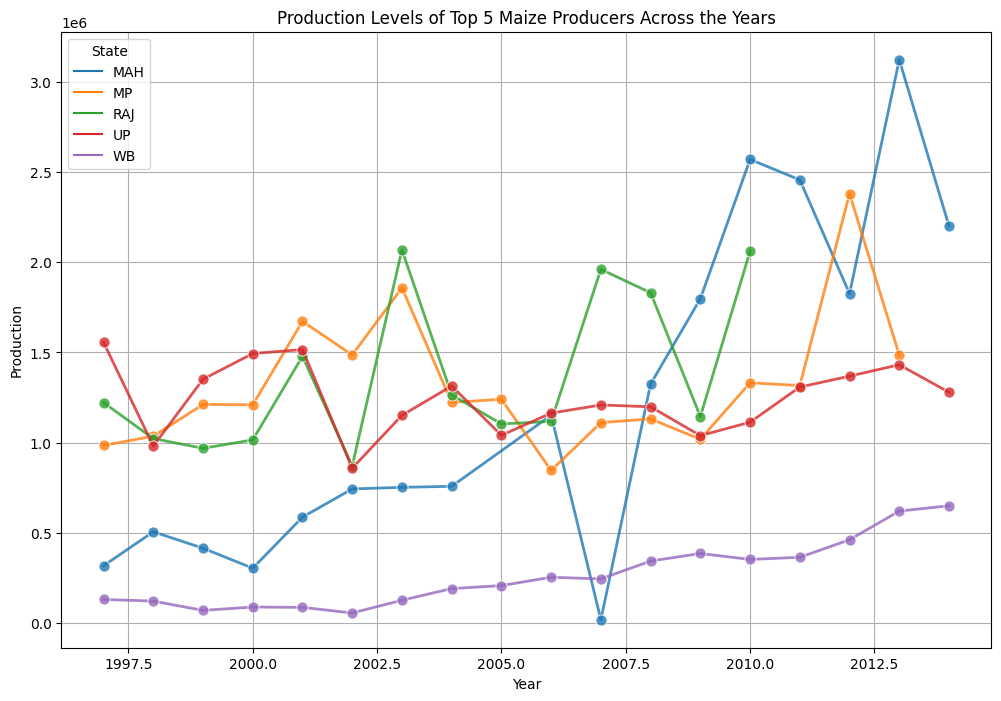

In [23]:
top_5_maize_states = avg_production_maize.sort_values(by='Production', ascending=False).head(5)['State_Name']

top_5_maize_df = maize_df[maize_df['State_Name'].isin(top_5_states)]

plt.figure(figsize=(12, 8))
sns.lineplot(x='Crop_Year', y='Production', hue='State_Name', data=top_5_maize_df, 
             palette='tab10', marker='o', markersize=8, linewidth=2, errorbar=None, alpha=0.8)

# Adding chart details
plt.title('Production Levels of Top 5 Maize Producers Across the Years')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend(title='State')
plt.grid(True)

# Display the plot
plt.show()

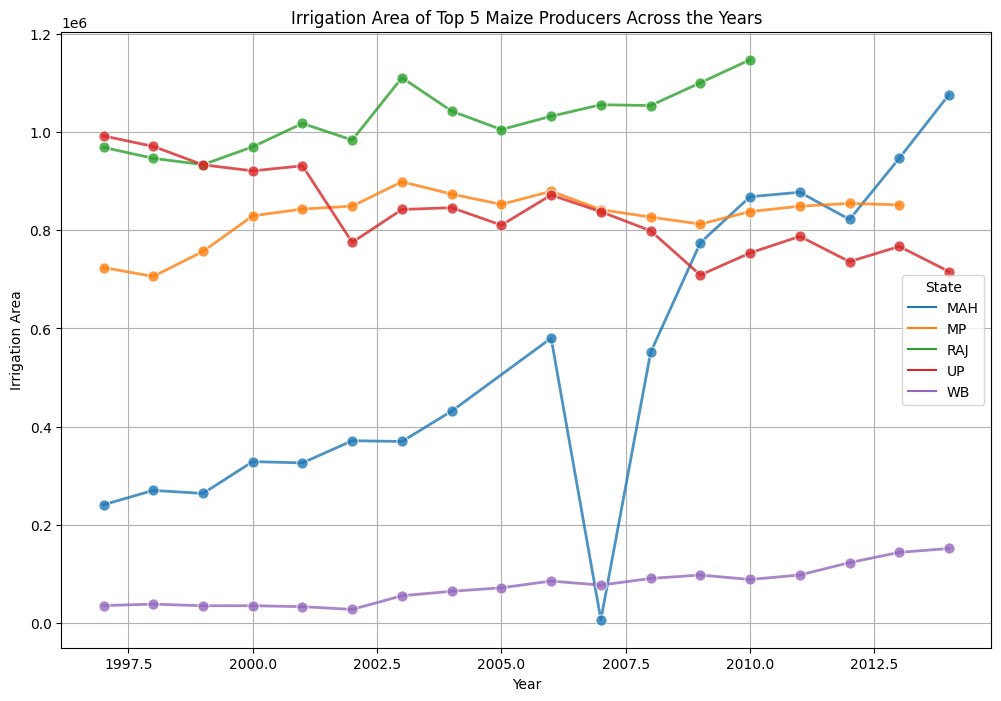

In [24]:
total_maize_area = maize_df.groupby(['State_Name', 'Crop_Year'])['Area'].sum().reset_index()

maize_area_5_states = total_maize_area.sort_values(by='Area', ascending=False).head(5)['State_Name']

maize_top_5_states = total_maize_area.groupby('State_Name')['Area'].sum().sort_values(ascending=False).head(5).index

top_5_maize_df = maize_df[maize_df['State_Name'].isin(top_5_states)]

plt.figure(figsize=(12, 8))

sns.lineplot(x='Crop_Year', y='Area', hue='State_Name', data=top_5_maize_df, 
             palette='tab10', marker='o', markersize=8, linewidth=2, errorbar=None, alpha=0.8)

plt.title('Irrigation Area of Top 5 Maize Producers Across the Years')
plt.xlabel('Year')
plt.ylabel('Irrigation Area')
plt.legend(title='State')
plt.grid(True)

plt.show()

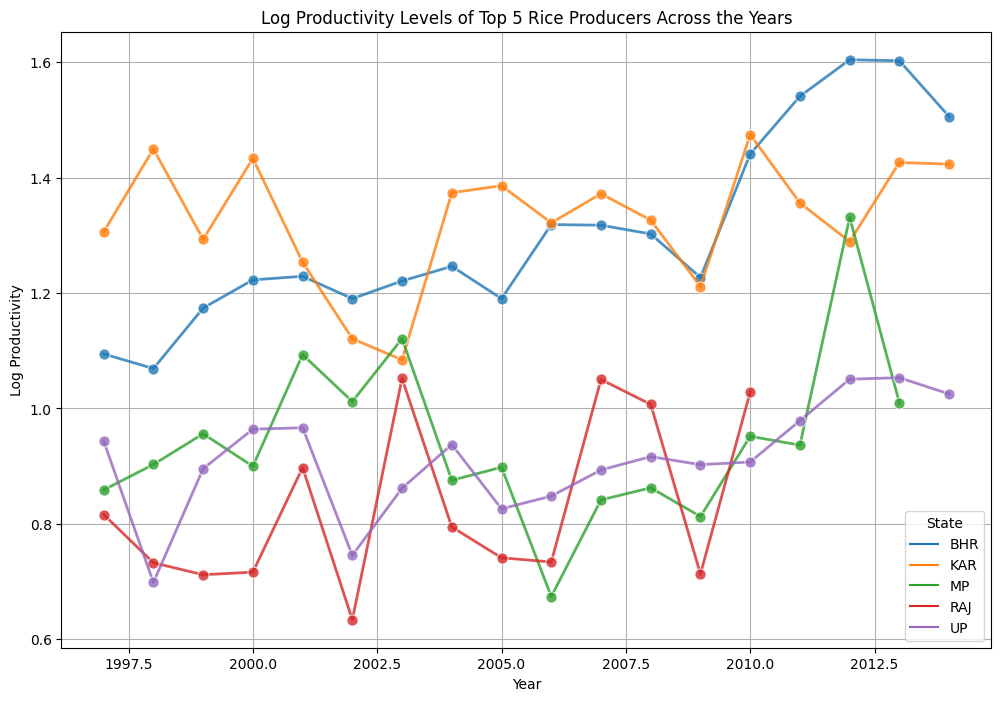

In [25]:
state_cum_df = maize_df.groupby(['Crop_Year', 'Crop', 'State_Name'])[['Area', 'Production']].sum().reset_index()

state_cum_df['Productivity'] = state_cum_df['Production'] / state_cum_df['Area']

state_cum_df['Log_Productivity'] = np.log(state_cum_df['Productivity'] + 1)

# Step 3: Identify the top 5 states by total area
top_5_states = state_cum_df.groupby('State_Name')['Area'].sum().sort_values(ascending=False).head(5).index

# Step 4: Filter the dataset for these top 5 states
top_5_productivity_df = state_cum_df[state_cum_df['State_Name'].isin(top_5_states)]

# Step 5: Plot the line chart for productivity levels
plt.figure(figsize=(12, 8))

# Using seaborn's lineplot
sns.lineplot(x='Crop_Year', y='Log_Productivity', hue='State_Name', data=top_5_productivity_df, 
             palette='tab10', marker='o', markersize=8, linewidth=2, errorbar=None, alpha=0.8)

# Adding chart details
plt.title('Log Productivity Levels of Top 5 Rice Producers Across the Years')
plt.xlabel('Year')
plt.ylabel('Log Productivity')
plt.legend(title='State')
plt.grid(True)

# Display the plot
plt.show()

In [26]:
ind_maize = maize_df.groupby('Crop_Year')['Production'].sum().reset_index()

# Set 'Crop_Year' as the index
ind_maize.set_index('Crop_Year', inplace=True)

ind_maize.rename(columns={'Production': 'Maize_Production'}, inplace=True)

# Convert 'Maize_Production' to integers
ind_maize['Maize_Production'] = ind_maize['Maize_Production'].astype(int)

# Display the updated DataFrame
ind_maize.T

Crop_Year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Maize_Production,9797054,10038590,11245483,11977311,12669242,11021981,14638847,13823196,13775161,14245663,17585721,18331296,15260108,22062416,19307949,17253317,23348084,16781092


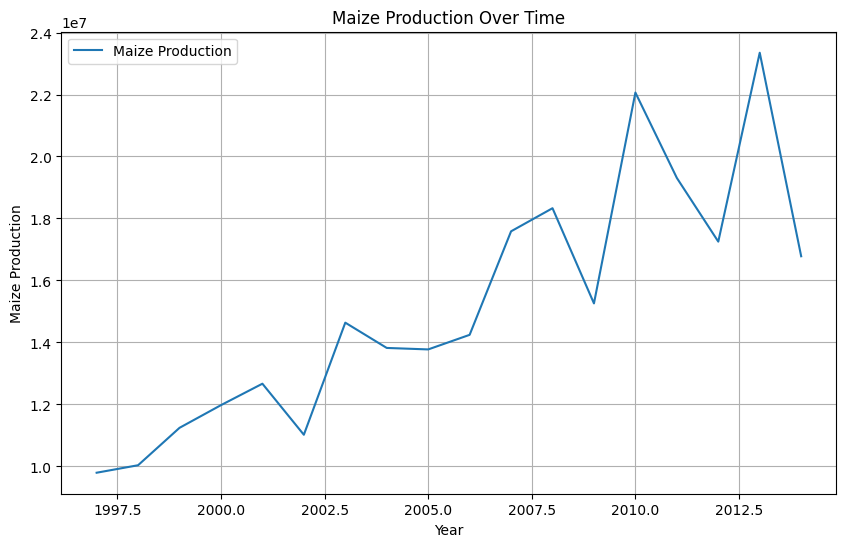

ADF Statistic: 0.5308860148113309
p-value: 0.9857822272719015


In [27]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(ind_maize, label='Maize Production')
plt.title('Maize Production Over Time')
plt.xlabel('Year')
plt.ylabel('Maize Production')
plt.legend()
plt.grid(True)
plt.show()

# Perform Augmented Dickey-Fuller test
result = adfuller(ind_maize['Maize_Production'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


Shape of X: (15, 3, 1)
Shape of y: (15, 1)
Reshaped X shape: (15, 3, 1)
Epoch 1/100
15/15 [==============================] - 4s 6ms/step - loss: 0.1767
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0455
Epoch 3/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0441
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0315
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0277
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0308
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0242
Epoch 8/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0262
Epoch 9/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0461
Epoch 10/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0424
Epoch 11/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0246
Epoch 12/100
15/15 [==========================

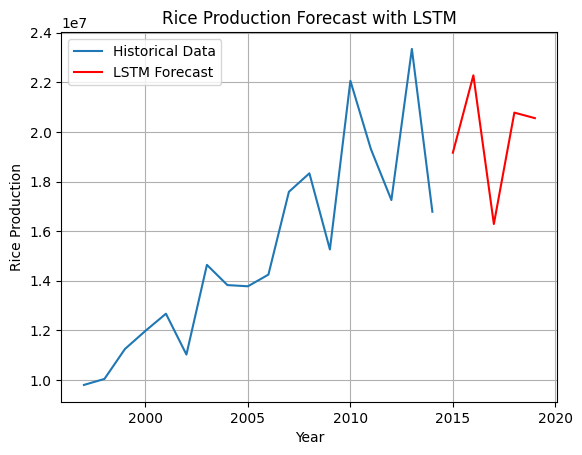

In [28]:
# Reshape data for LSTM - only use 'Rice_Production' (univariate series)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ind_maize[['Maize_Production']])  # Ensure we only scale the rice production column

# Function to create sequences of data for LSTM
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Parameters
sequence_length = 3  # Choose how many time steps to look back

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Debugging: Print the shape of X and y to ensure correctness
print(f"Shape of X: {X.shape}")  # Should be (samples, time steps, 1 feature)
print(f"Shape of y: {y.shape}")  # Should be (samples, )

# Ensure X has the correct shape for LSTM input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Adding the feature dimension

# Debugging: After reshaping, let's check the shape again
print(f"Reshaped X shape: {X.shape}")  # Should be (samples, time steps, 1 feature)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, batch_size=1, epochs=100)

# Forecast next 5 years
last_sequence = scaled_data[-sequence_length:].reshape(1, sequence_length, 1)  # Use last available sequence
predictions = []
for i in range(5):
    pred = model.predict(last_sequence)
    predictions.append(pred[0, 0])
    
    # Reshape the prediction to match the shape of last_sequence
    pred_reshaped = np.array([[[pred[0, 0]]]])  # Reshape pred into (1, 1, 1) so it can be concatenated

    # Update the sequence with the predicted value
    last_sequence = np.append(last_sequence[:, 1:, :], pred_reshaped, axis=1)

# Inverse scale the predictions to get back to the original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Plot the results
plt.plot(ind_maize.index, ind_maize['Maize_Production'], label='Historical Data')
future_years = np.arange(2015, 2020)
plt.plot(future_years, predictions, label='LSTM Forecast', color='red')
plt.title('Rice Production Forecast with LSTM')
plt.xlabel('Year')
plt.ylabel('Rice Production')
plt.legend()
plt.grid(True)
plt.show()

# III. Moong Dal

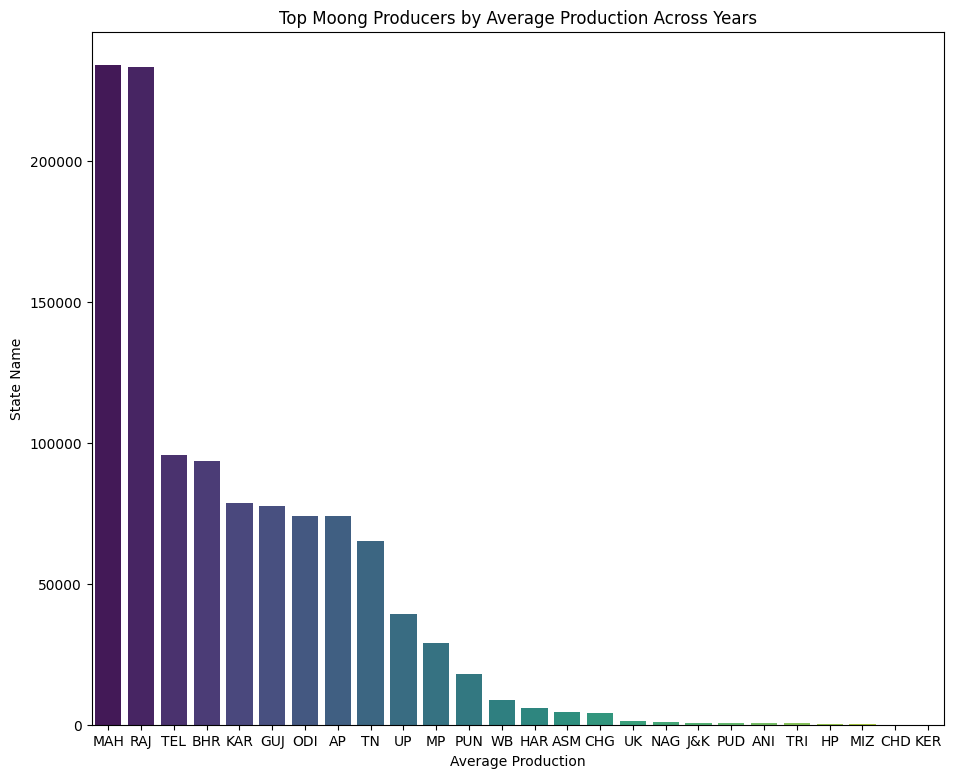

In [29]:
# Highest Production as per states.

moong_df = subset_df[subset_df['Crop'] == 'Moong(Green Gram)']

avg_moong_prod = moong_df.groupby('State_Name')['Production'].mean().reset_index()

avg_moong_prod_sort = avg_moong_prod.sort_values(by='Production', ascending=False)

plt.figure(figsize=(11, 9))
sns.barplot(x='State_Name', y='Production', data = avg_moong_prod_sort, palette='viridis')
plt.title('Top Moong Producers by Average Production Across Years')
plt.xlabel('Average Production')
plt.ylabel('State Name')
plt.show()


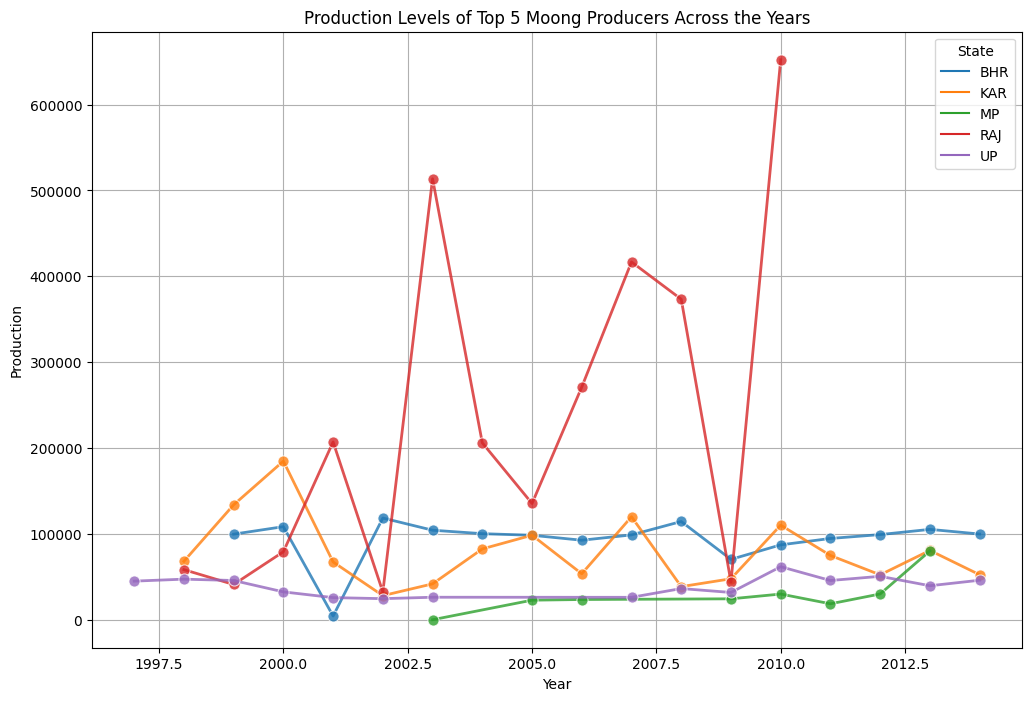

In [30]:
top_5_moong_states = avg_moong_prod.sort_values(by='Production', ascending=False).head(5)['State_Name']

top_5_moong_df = moong_df[moong_df['State_Name'].isin(top_5_states)]

plt.figure(figsize=(12, 8))
sns.lineplot(x='Crop_Year', y='Production', hue='State_Name', data = top_5_moong_df, 
             palette='tab10', marker='o', markersize=8, linewidth=2, errorbar=None, alpha=0.8)

# Adding chart details
plt.title('Production Levels of Top 5 Moong Producers Across the Years')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend(title='State')
plt.grid(True)

# Display the plot
plt.show()

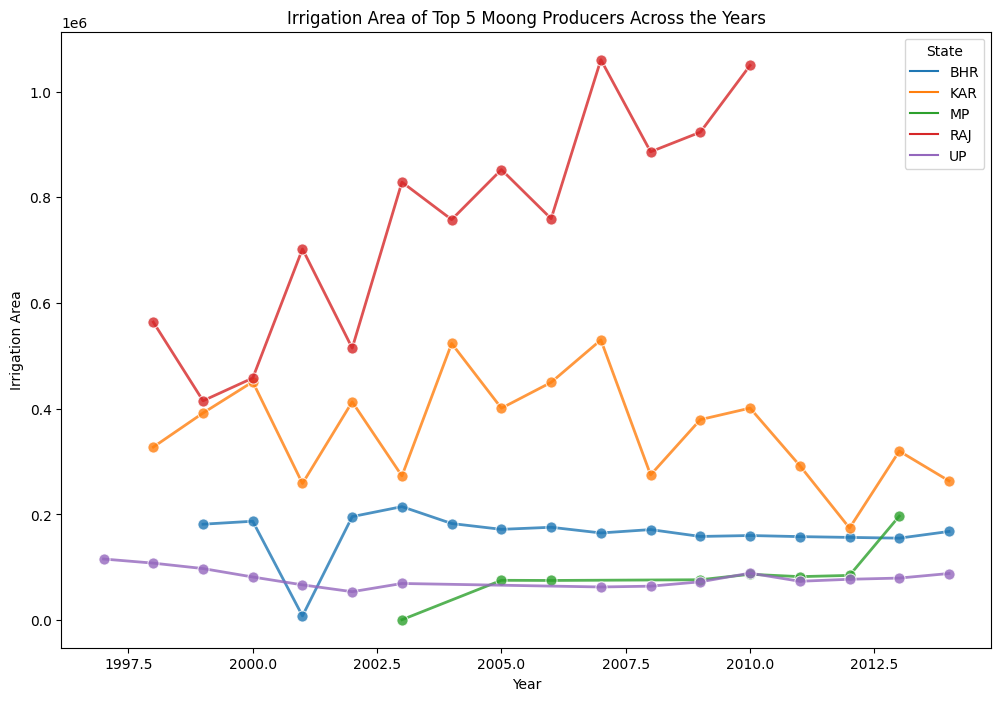

In [31]:
total_moong_area = moong_df.groupby(['State_Name', 'Crop_Year'])['Area'].sum().reset_index()

moong_area_5_states = total_moong_area.sort_values(by='Area', ascending=False).head(5)['State_Name']

moong_top_5_states = total_moong_area.groupby('State_Name')['Area'].sum().sort_values(ascending=False).head(5).index

top_5_moong_df = moong_df[moong_df['State_Name'].isin(top_5_states)]

plt.figure(figsize=(12, 8))

sns.lineplot(x='Crop_Year', y='Area', hue='State_Name', data=top_5_moong_df, 
             palette='tab10', marker='o', markersize=8, linewidth=2, errorbar=None, alpha=0.8)

plt.title('Irrigation Area of Top 5 Moong Producers Across the Years')
plt.xlabel('Year')
plt.ylabel('Irrigation Area')
plt.legend(title='State')


plt.show()

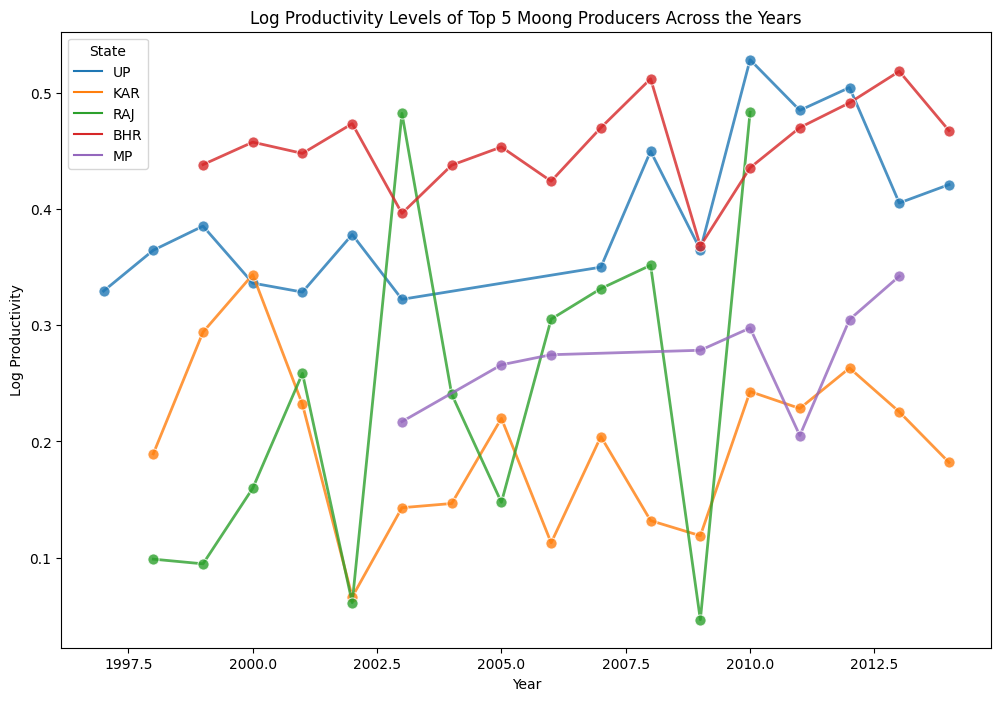

In [32]:
state_moong_df = moong_df.groupby(['Crop_Year', 'Crop', 'State_Name'])[['Area', 'Production']].sum().reset_index()

state_moong_df['Productivity'] = state_moong_df['Production'] / state_moong_df['Area']

state_moong_df['Log_Productivity'] = np.log(state_moong_df['Productivity'] + 1)

# Step 3: Identify the top 5 states by total area
top_5_moong_states = state_moong_df.groupby('State_Name')['Area'].sum().sort_values(ascending=False).head(5).index

# Step 4: Filter the dataset for these top 5 states
top_5_moong_productivity_df = state_moong_df[state_moong_df['State_Name'].isin(top_5_states)]

# Step 5: Plot the line chart for productivity levels
plt.figure(figsize=(12, 8))

# Using seaborn's lineplot
sns.lineplot(x='Crop_Year', y='Log_Productivity', hue='State_Name', data=top_5_moong_productivity_df, 
             palette='tab10', marker='o', markersize=8, linewidth=2, errorbar=None, alpha=0.8)

# Adding chart details
plt.title('Log Productivity Levels of Top 5 Moong Producers Across the Years')
plt.xlabel('Year')
plt.ylabel('Log Productivity')
plt.legend(title='State')

# Display the plot
plt.show()

In [33]:
ind_moong = moong_df.groupby('Crop_Year')['Production'].sum().reset_index()

# Set 'Crop_Year' as the index
ind_moong.set_index('Crop_Year', inplace=True)

ind_moong.rename(columns={'Production': 'Moong_Production'}, inplace=True)

# Convert 'Moong_Production' to integers
ind_moong['Moong_Production'] = ind_moong['Moong_Production'].astype(int)

# Display the updated DataFrame
ind_moong.T

Crop_Year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Moong_Production,574384,1009451,1200621,1026199,963747,865919,1661228,998654,947198,1057304,1120509,997332,640078,1792063,1005520,735726,981588,640437


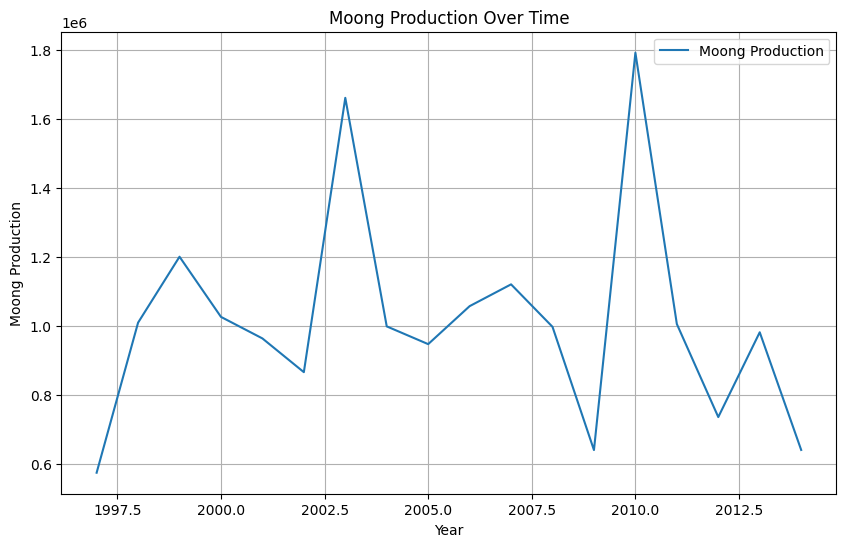

ADF Statistic: -0.436048402090924
p-value: 0.9039037769268421


In [34]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(ind_moong, label='Moong Production')
plt.title('Moong Production Over Time')
plt.xlabel('Year')
plt.ylabel('Moong Production')
plt.legend()
plt.grid(True)
plt.show()

# Perform Augmented Dickey-Fuller test
result = adfuller(ind_moong['Moong_Production'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


Shape of X: (15, 3, 1)
Shape of y: (15, 1)
Reshaped X shape: (15, 3, 1)
Epoch 1/100
15/15 [==============================] - 4s 6ms/step - loss: 0.1404
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0661
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0692
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0717
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0721
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0680
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0674
Epoch 8/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0682
Epoch 9/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0681
Epoch 10/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0672
Epoch 11/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0687
Epoch 12/100
15/15 [==========================

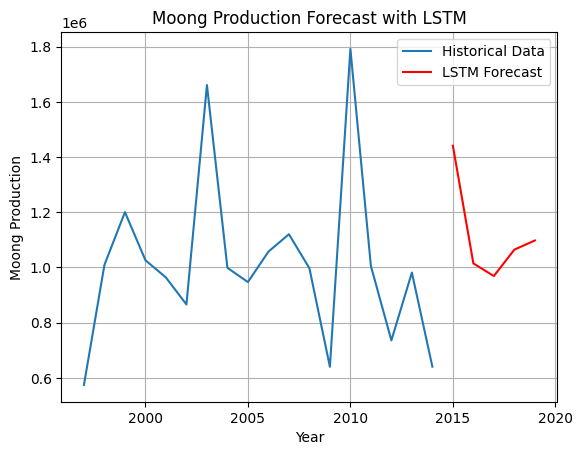

In [35]:
# Reshape data for LSTM - only use 'Moong_Production' (univariate series)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ind_moong[['Moong_Production']])  # Ensure we only scale the rice production column

# Function to create sequences of data for LSTM
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Parameters
sequence_length = 3  # Choose how many time steps to look back

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Debugging: Print the shape of X and y to ensure correctness
print(f"Shape of X: {X.shape}")  # Should be (samples, time steps, 1 feature)
print(f"Shape of y: {y.shape}")  # Should be (samples, )

# Ensure X has the correct shape for LSTM input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Adding the feature dimension

# Debugging: After reshaping, let's check the shape again
print(f"Reshaped X shape: {X.shape}")  # Should be (samples, time steps, 1 feature)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, batch_size=1, epochs=100)

# Forecast next 5 years
last_sequence = scaled_data[-sequence_length:].reshape(1, sequence_length, 1)  # Use last available sequence
predictions = []
for i in range(5):
    pred = model.predict(last_sequence)
    predictions.append(pred[0, 0])
    
    # Reshape the prediction to match the shape of last_sequence
    pred_reshaped = np.array([[[pred[0, 0]]]])  # Reshape pred into (1, 1, 1) so it can be concatenated

    # Update the sequence with the predicted value
    last_sequence = np.append(last_sequence[:, 1:, :], pred_reshaped, axis=1)

# Inverse scale the predictions to get back to the original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Plot the results
plt.plot(ind_moong.index, ind_moong['Moong_Production'], label='Historical Data')
future_years = np.arange(2015, 2020)
plt.plot(future_years, predictions, label='LSTM Forecast', color='red')
plt.title('Moong Production Forecast with LSTM')
plt.xlabel('Year')
plt.ylabel('Moong Production')
plt.legend()
plt.grid(True)
plt.show()